In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/mushrooms.csv')

In [3]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
df['stalk-root'] == '?'

0       False
1       False
2       False
3       False
4       False
        ...  
8119     True
8120     True
8121     True
8122     True
8123     True
Name: stalk-root, Length: 8124, dtype: bool

In [5]:
labels = df.iloc[0, 0:23]

In [6]:
labels = list(labels.index[0:23])

In [7]:
df = df.apply(LabelEncoder().fit_transform)

In [8]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [9]:
x_df = df.iloc[:, 1:23]
y_df = df.iloc[:, 0]

In [10]:
x_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [11]:
y_df

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [12]:
sr = x_df.iloc[:, 10]

In [13]:
sr = sr.to_numpy().reshape(-1, 1)

In [14]:
x_df.iloc[:, 10].value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64

In [15]:
preenche_missing = SimpleImputer(missing_values = 0, strategy = 'mean')
sr = preenche_missing.fit_transform(sr)

In [16]:
sr

array([[3.        ],
       [2.        ],
       [2.        ],
       ...,
       [1.59744862],
       [1.59744862],
       [1.59744862]])

In [17]:
x_df['stalk-root'] = sr

<ipython-input-17-65d68320e13c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['stalk-root'] = sr


In [18]:
x_df['stalk-root']

0       3.000000
1       2.000000
2       2.000000
3       3.000000
4       3.000000
          ...   
8119    1.597449
8120    1.597449
8121    1.597449
8122    1.597449
8123    1.597449
Name: stalk-root, Length: 8124, dtype: float64

In [19]:
x_df.dtypes

cap-shape                     int32
cap-surface                   int32
cap-color                     int32
bruises                       int32
odor                          int32
gill-attachment               int32
gill-spacing                  int32
gill-size                     int32
gill-color                    int32
stalk-shape                   int32
stalk-root                  float64
stalk-surface-above-ring      int32
stalk-surface-below-ring      int32
stalk-color-above-ring        int32
stalk-color-below-ring        int32
veil-type                     int32
veil-color                    int32
ring-number                   int32
ring-type                     int32
spore-print-color             int32
population                    int32
habitat                       int32
dtype: object

In [20]:
x_df = x_df.astype('float64')

In [21]:
x_df.dtypes

cap-shape                   float64
cap-surface                 float64
cap-color                   float64
bruises                     float64
odor                        float64
gill-attachment             float64
gill-spacing                float64
gill-size                   float64
gill-color                  float64
stalk-shape                 float64
stalk-root                  float64
stalk-surface-above-ring    float64
stalk-surface-below-ring    float64
stalk-color-above-ring      float64
stalk-color-below-ring      float64
veil-type                   float64
veil-color                  float64
ring-number                 float64
ring-type                   float64
spore-print-color           float64
population                  float64
habitat                     float64
dtype: object

In [22]:
y_df = y_df.values

In [23]:
x_df = x_df.values

In [24]:
x_df[:, 0:22]

array([[5., 2., 4., ..., 2., 3., 5.],
       [5., 2., 9., ..., 3., 2., 1.],
       [0., 2., 8., ..., 3., 2., 3.],
       ...,
       [2., 2., 4., ..., 0., 1., 2.],
       [3., 3., 4., ..., 7., 4., 2.],
       [5., 2., 4., ..., 4., 1., 2.]])

In [25]:
#onehotencoder_mushrooms = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), x_df[:, 0:22])], remainder='passthrough')

In [26]:
#onehotencoder_mushrooms

In [27]:
x_df = OneHotEncoder().fit_transform(x_df).toarray()

In [28]:
x_df.shape

(8124, 117)

In [29]:
x_df

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
scaler_mushrooms = StandardScaler()
x_df = scaler_mushrooms.fit_transform(x_df)

In [31]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_df, y_df, test_size = 0.15, random_state=1)

In [32]:
x_treino.shape, y_treino.shape

((6905, 117), (6905,))

In [33]:
x_teste.shape, y_teste.shape

((1219, 117), (1219,))

In [34]:
x_treino

array([[-0.24272523, -0.02219484,  1.2559503 , ...,  2.47010093,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [35]:
random_forest_mushrooms = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_mushrooms.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', random_state=0)

In [36]:
previsoes = random_forest_mushrooms.predict(x_teste)
previsoes

array([0, 1, 1, ..., 0, 1, 1])

In [37]:
y_teste

array([0, 1, 1, ..., 0, 1, 1])

In [38]:
accuracy_score(y_teste, previsoes)

1.0

1.0

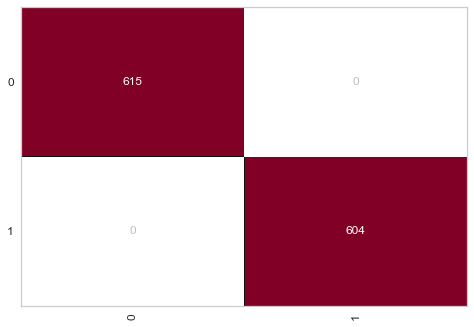

In [39]:
cm = ConfusionMatrix(random_forest_mushrooms)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [40]:
x_teste

array([[-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484,  1.2559503 , ...,  2.47010093,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [41]:
y_teste

array([0, 1, 1, ..., 0, 1, 1])

In [42]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()

In [43]:
x_treino

array([[-0.24272523, -0.02219484,  1.2559503 , ...,  2.47010093,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

0.9614438063986874

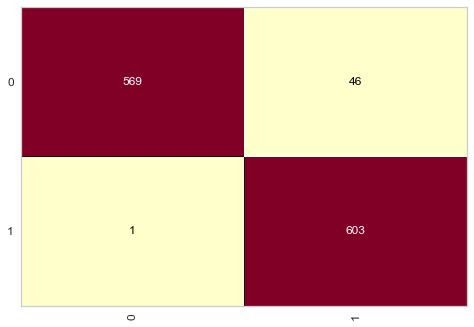

In [44]:
cm = ConfusionMatrix(modelo)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [49]:
modelo.predict(x_treino[[15],[6]].reshape(1,-1))

array([0])

In [51]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32